# Handwritten Multi-Digit Recognition Hackathon

This notebook contains a complete solution for the hackathon project to recognize hand-drawn multi-digit numbers using the MNIST dataset and deep learning.

## Objectives
- Train a neural network on the MNIST dataset
- Build a model to predict hand-drawn digits
- Integrate the model into a Streamlit UI for live drawing input
- Deploy the app on Streamlit Cloud


## Model

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8359 - loss: 0.5040 - val_accuracy: 0.9843 - val_loss: 0.0542
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9775 - loss: 0.0715 - val_accuracy: 0.9865 - val_loss: 0.0493
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9845 - loss: 0.0480 - val_accuracy: 0.9913 - val_loss: 0.0332
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.9886 - loss: 0.0366 - val_accuracy: 0.9918 - val_loss: 0.0303
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9913 - loss: 0.0265 - val_accuracy: 0.9915 - val_loss: 0.0294


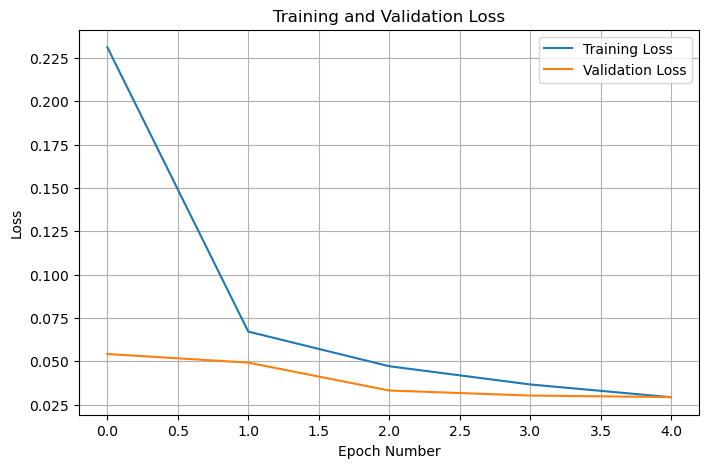

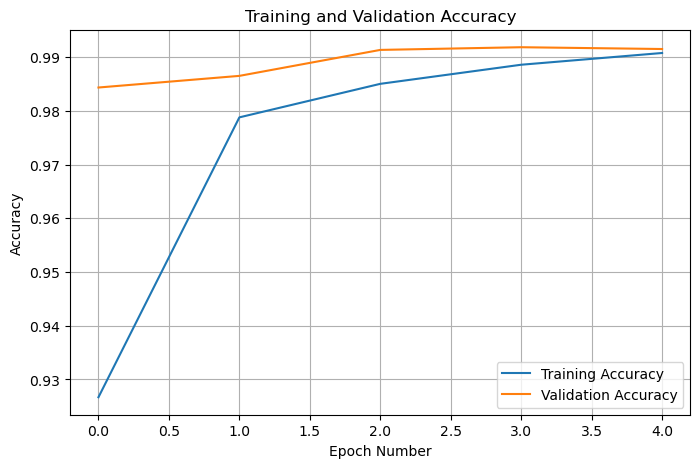

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9916 - loss: 0.0263
Test Accuracy: 0.9931


In [19]:
# ~~~ Working on the Data set ~~~

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical

# Set a random seed for reproducibility
np.random.seed(42)

# Load the mnist dataset from keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the training data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

# Preprocess the test data
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# ~~~ Model ~~~

# Create the model
model = models.Sequential()

# Add convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output for the dense layer
model.add(layers.Flatten())

# Add dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
training_history = model.fit(train_images, train_labels,
                             epochs=5,
                             batch_size=64,
                             validation_split=0.1)

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the model
model.save('mnist2.h5')


In [21]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ------ --------------------------------- 6.8/39.5 MB 34.9 MB/s eta 0:00:01
   --------------- ------------------------ 15.5/39.5 MB 38.9 MB/s eta 0:00:01
   ------------------------ --------------- 24.1/39.5 MB 40.2 MB/s eta 0:00:01
   ----------------------------- ---------- 29.4/39.5 MB 35.8 MB/s eta 0:00:01
   -------------------------------- ------- 32.0/39.5 MB 31.7 MB/s eta 0:00:01
   ---------------------------------- ----- 33.8/39.5 MB 28.6 MB/s eta 0:00:01
   ------------------------------------- -- 36.7/39.5 MB 25.3 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 24.5 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 24.5 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 18.9 MB/s eta 0:00:00
